Este conjunto de datos incluye datos para la estimación de niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimentarios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NObesity (Nivel de Obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I. , Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generaron de forma sintética utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recogieron directamente de los usuarios a través de una plataforma web.

Diccionario de datos:

¿Cuál es su género?
     •Femenino
     •Masculino

¿Cuál es tu edad? Valor numérico
¿Cuál es su altura? Valor numérico en metros
¿Cuál es tu peso? Valor numérico en kilogramos
¿Algún familiar ha padecido o padece sobrepeso?
     •Sí
     •No

¿Comes alimentos ricos en calorías con frecuencia?
     •Sí
     •No

¿Sueles comer verduras en tus comidas?
     •Nunca
     •A veces
     •Siempre

¿Cuántas comidas principales haces al día?
     •Entre 1 y 2
     •Tres
     •Mas de tres

¿Comes algún alimento entre horas?
     •No
     •A veces
     •Frecuentemente
     •Siempre

¿Fuma usted?
     •Sí
     •No

¿Cuánta agua bebes diariamente?
     •menos de un litro
     •Entre 1 y 2 litros
     •Más de 2 litros

¿Controlas las calorías que comes diariamente?
     •Sí
     •No

¿Con qué frecuencia realiza actividad física?
     •no tengo
     •1 o 2 días
     •2 o 4 días
     •4 o 5 días

¿Cuánto tiempo utilizas dispositivos tecnológicos como celular, videojuegos, televisión, computadora y otros?
     •0–2 horas
     •3 a 5 horas
     •Más de 5 horas

¿Con qué frecuencia bebes alcohol?
     •No bebo
     •A veces
     •Frecuentemente
     •Siempre

¿Qué transporte utilizas habitualmente?
     •Automóvil
     •Moto
     •Bicicleta
     •Transporte público
     •Caminando

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree

In [141]:
warnings.filterwarnings("ignore")

In [142]:
df =  pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [143]:
df.head(15)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC   
0   Female  21.0    1.62    64.0                            yes   no   2.0  \
1   Female  21.0    1.52    56.0                            yes   no   3.0   
2     Male  23.0    1.80    77.0                            yes   no   2.0   
3     Male  27.0    1.80    87.0                             no   no   3.0   
4     Male  22.0    1.78    89.8                             no   no   2.0   
5     Male  29.0    1.62    53.0                             no  yes   2.0   
6   Female  23.0    1.50    55.0                            yes  yes   3.0   
7     Male  22.0    1.64    53.0                             no   no   2.0   
8     Male  24.0    1.78    64.0                            yes  yes   3.0   
9     Male  22.0    1.72    68.0                            yes  yes   2.0   
10    Male  26.0    1.85   105.0                            yes  yes   3.0   
11  Female  21.0    1.72    80.0                            yes  yes   2.0   
12    Male  22.0    1.65    56.0                             no   no   3.0   
13    Male  41.0    1.80    99.0                             no  yes   2.0   
14    Male  23.0    1.77    60.0                            yes  yes   3.0   

    NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC   
0   3.0   Sometimes    no   2.0   no  0.0  1.0          no  \
1   3.0   Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   3.0   Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   1.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5   3.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6   3.0   Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7   3.0   Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8   3.0   Sometimes    no   2.0   no  1.0  1.0  Frequently   
9   3.0   Sometimes    no   2.0   no  1.0  1.0          no   
10  3.0  Frequently    no   3.0   no  2.0  2.0   Sometimes   
11  3.0  Frequently    no   2.0  yes  2.0  1.0   Sometimes   
12  3.0   Sometimes    no   3.0   no  2.0  0.0   Sometimes   
13  3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
14  1.0   Sometimes    no   1.0   no  1.0  1.0   Sometimes   

                   MTRANS           NObeyesdad  
0   Public_Transportation        Normal_Weight  
1   Public_Transportation        Normal_Weight  
2   Public_Transportation        Normal_Weight  
3                 Walking   Overweight_Level_I  
4   Public_Transportation  Overweight_Level_II  
5              Automobile        Normal_Weight  
6               Motorbike        Normal_Weight  
7   Public_Transportation        Normal_Weight  
8   Public_Transportation        Normal_Weight  
9   Public_Transportation        Normal_Weight  
10  Public_Transportation       Obesity_Type_I  
11  Public_Transportation  Overweight_Level_II  
12  Public_Transportation        Normal_Weight  
13             Automobile       Obesity_Type_I  
14  Public_Transportation        Normal_Weight

In [144]:
df.shape

(2111, 17)

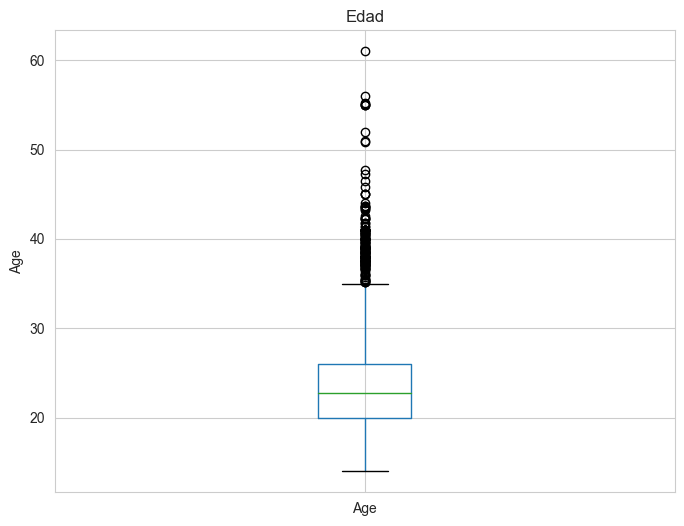

In [145]:
#BOXPLOTS

plt.figure(figsize=(8, 6))
df.boxplot(column='Age')
plt.title('Edad')
plt.ylabel('Age')
plt.show()

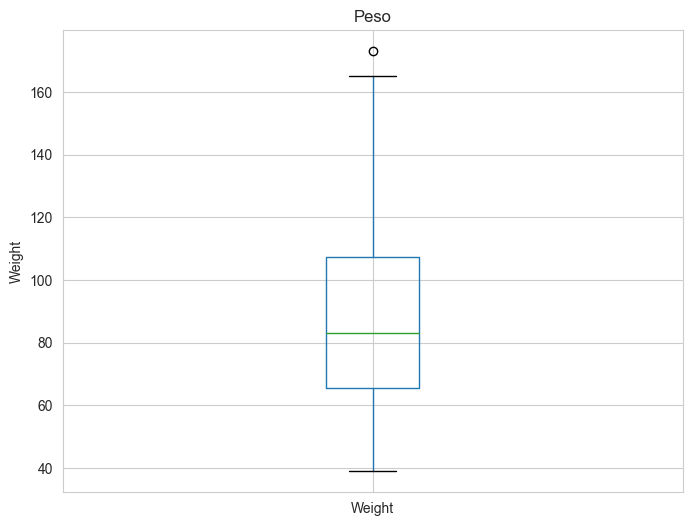

In [146]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Weight')
plt.title('Peso')
plt.ylabel('Weight')
plt.show()

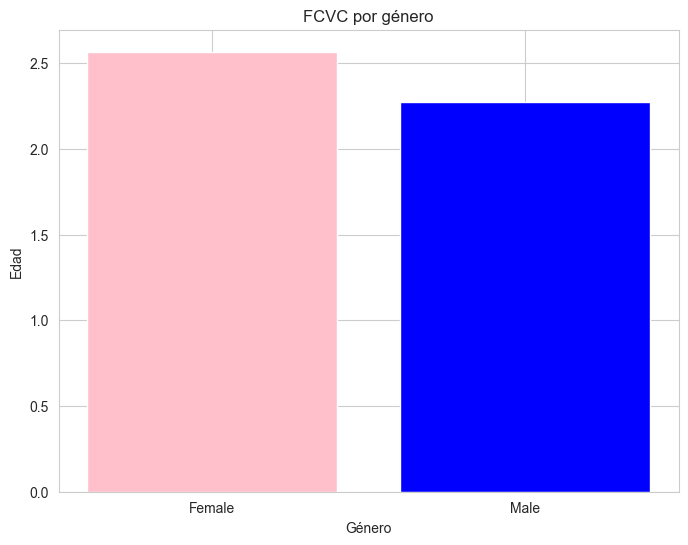

In [147]:
grupo_edad = df.groupby('Gender')['FCVC'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(grupo_edad['Gender'], grupo_edad['FCVC'], color=['pink', 'blue'])
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('FCVC por género')
plt.show()

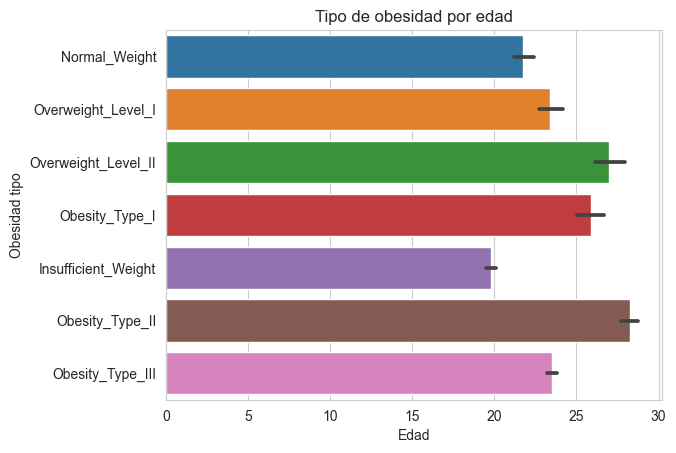

<Figure size 800x600 with 0 Axes>

In [148]:
#Grafica de barras
sns.barplot(y='NObeyesdad', x='Age', data=df)

plt.xlabel('Edad')
plt.ylabel('Obesidad tipo')
plt.title('Tipo de obesidad por edad')
plt.figure(figsize=(8, 6))

plt.show()

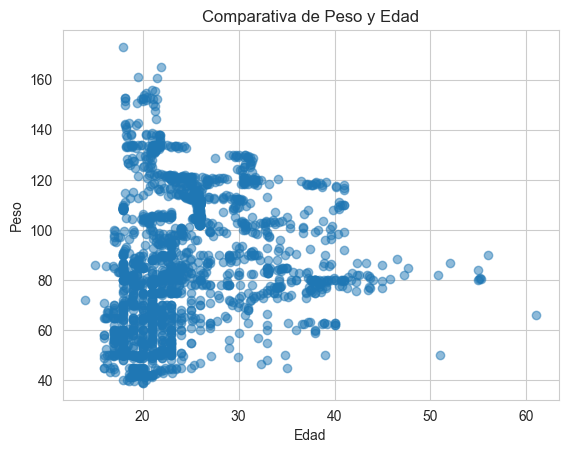

In [149]:
# Gráfico de dispersión
plt.scatter(df['Age'], df['Weight'], alpha=0.5)

plt.xlabel('Edad')
plt.ylabel('Peso')
plt.title('Comparativa de Peso y Edad')

plt.show()

<Axes: xlabel='Age', ylabel='Weight'>

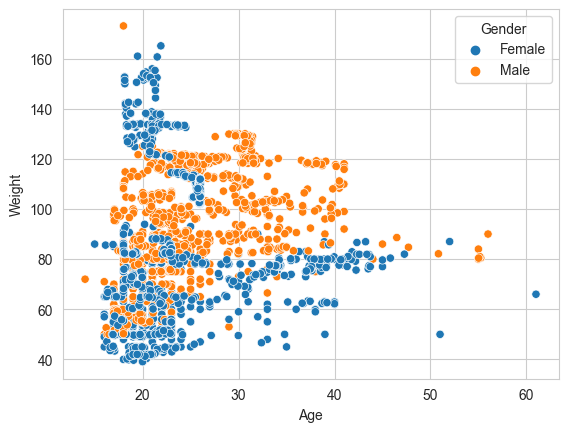

In [150]:
sns.scatterplot(data=df, x="Age", y="Weight", hue="Gender")

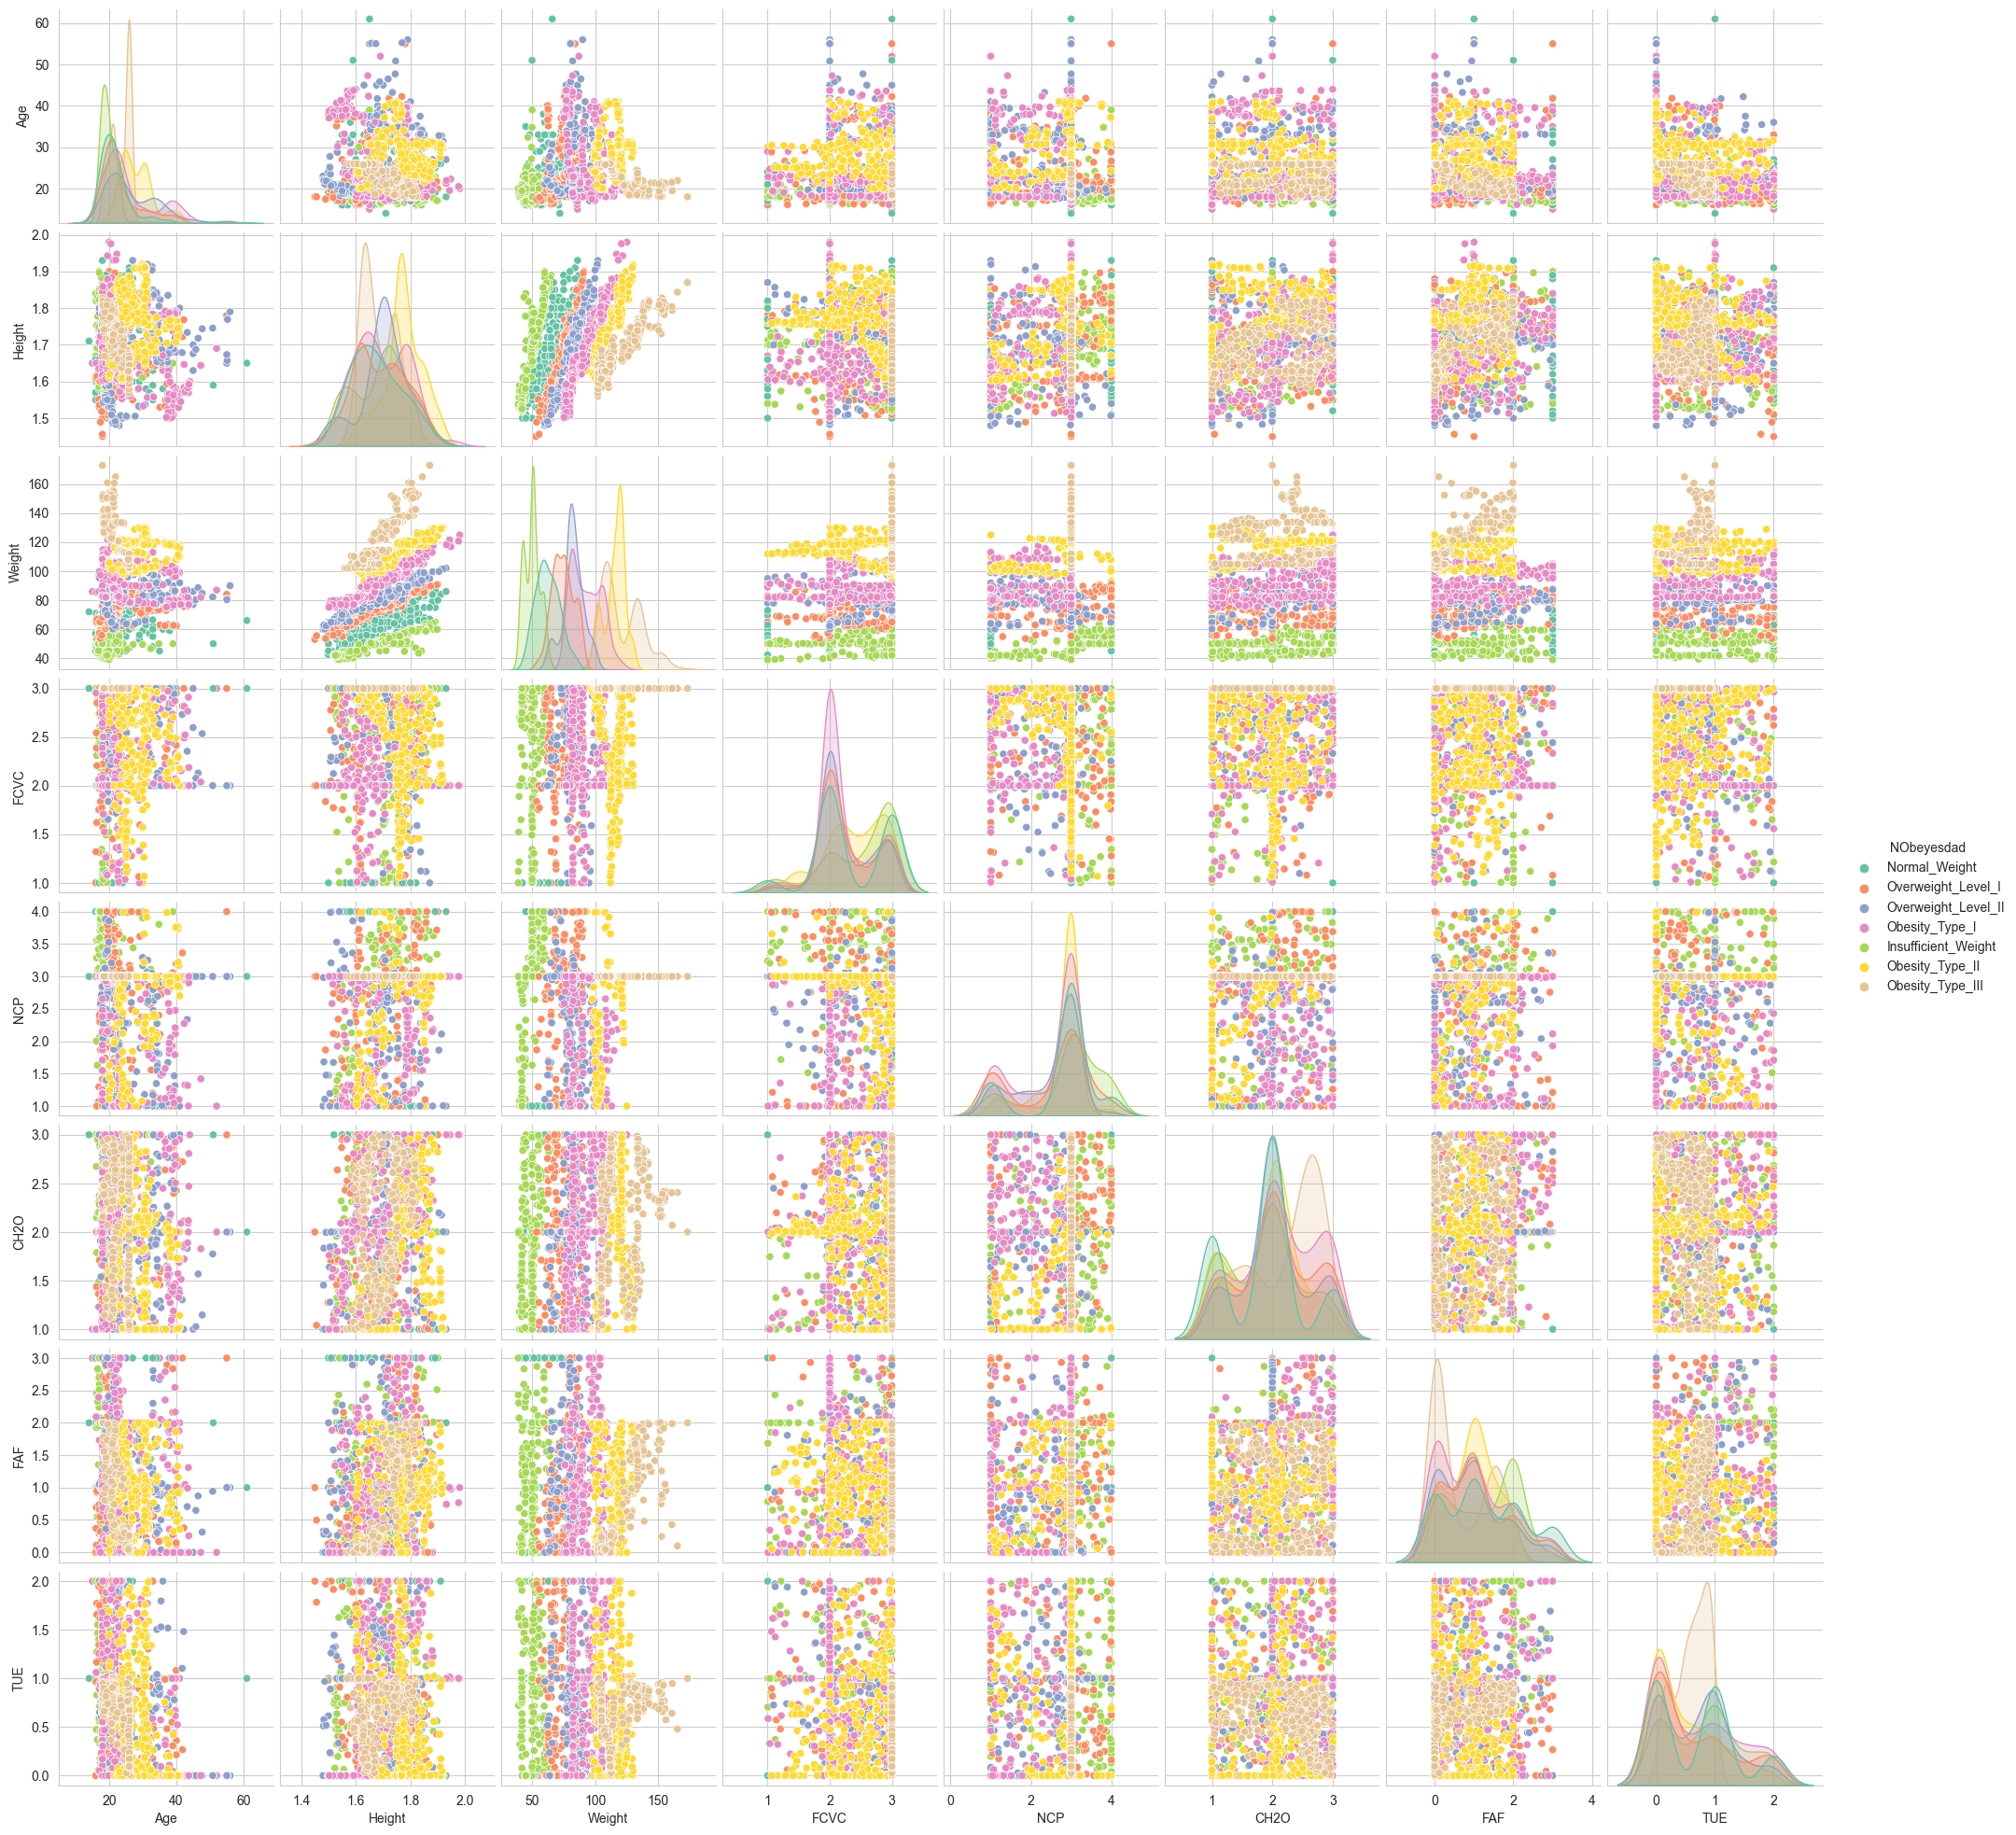

In [151]:
sns.pairplot(df, kind="scatter", hue="NObeyesdad", palette="Set2")

<Axes: xlabel='Weight', ylabel='Age'>

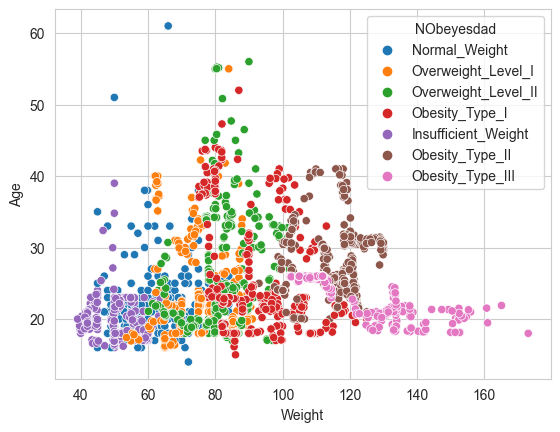

In [152]:
sns.scatterplot(data=df ,y='Age', x='Weight', hue='NObeyesdad')

In [153]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [154]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [155]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [156]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [158]:
df.describe()

Age       Height       Weight         FCVC          NCP   
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000  \
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [159]:
df.tail()

Gender        Age    Height      Weight family_history_with_overweight   
2106  Female  20.976842  1.710730  131.408528                            yes  \
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE   
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247  \
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

In [160]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [161]:
df_train =  df

In [162]:
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Aplicar One-Hot Encoding a las variables categóricas
df = pd.get_dummies(df, columns=categorical_variables)

# Ahora las variables categóricas seleccionadas están codificadas como variables binarias (0 o 1)
print(df.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female   
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           True  \
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           True   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0          False   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0          False   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0          False   

   Gender_Male  ...  MTRANS_Motorbike  MTRANS_Public_Transportation   
0        False  ...             False                          True  \
1        False  ...             False                          True   
2         True  ...             False                          True   
3         True  ...             False                         False   
4         True  ...             False                          True   

   MTRANS_Walking  NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight   
0           False                           False                      True  \


In [163]:
print(df.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female   
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           True  \
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           True   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0          False   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0          False   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0          False   

   Gender_Male  ...  MTRANS_Motorbike  MTRANS_Public_Transportation   
0        False  ...             False                          True  \
1        False  ...             False                          True   
2         True  ...             False                          True   
3         True  ...             False                         False   
4         True  ...             False                          True   

   MTRANS_Walking  NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight   
0           False                           False                      True  \


In [164]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                         Age    Height    Weight      FCVC   
Age                                 1.000000 -0.025958  0.202560  0.016291  \
Height                             -0.025958  1.000000  0.463136 -0.038121   
Weight                              0.202560  0.463136  1.000000  0.216125   
FCVC                                0.016291 -0.038121  0.216125  1.000000   
NCP                                -0.043944  0.243672  0.107469  0.042216   
CH2O                               -0.045304  0.213376  0.200575  0.068461   
FAF                                -0.144938  0.294709 -0.051436  0.019939   
TUE                                -0.296931  0.051912 -0.071561 -0.101135   
Gender_Female                      -0.048394 -0.618466 -0.161668  0.274505   
Gender_Male                         0.048394  0.618466  0.161668 -0.274505   
family_history_with_overweight_no  -0.205725 -0.247684 -0.496820 -0.040372   
family_history_with_overweight_yes  0.205725  0.247684  0.496820

<Axes: >

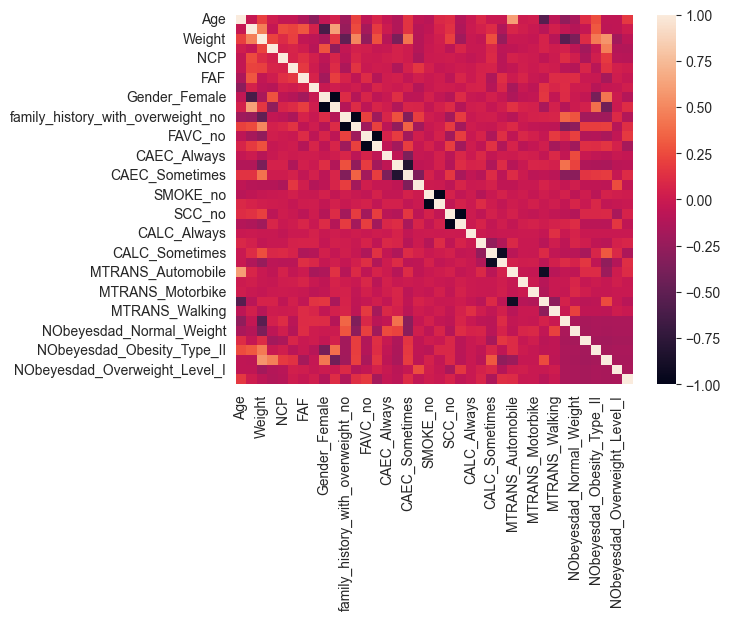

In [165]:
sns.heatmap(df.corr())

In [166]:
categorical_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS' ]


In [167]:
# Seleccionar las características relevantes (variables predictoras) y la variable objetivo
features = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']]
target = df_train['NObeyesdad']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [242]:
# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=300, random_state=None)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [243]:
#predicciones
y_pred = model.predict(X_test)

In [244]:
#Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.9456264775413712


In [245]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [246]:
puntuaciones = cross_val_score(model, features, target, cv=kf)


In [247]:
print("Puntuaciones de validación cruzada:", puntuaciones)
print("Puntuación media de validación cruzada:", puntuaciones.mean())
print("Desviacion Estandar", puntuaciones.std())

Puntuaciones de validación cruzada: [0.94089835 0.93601896 0.94549763 0.93364929 0.95734597]
Puntuación media de validación cruzada: 0.9426820386989793
Desviacion Estandar 0.008391987421566459


In [248]:
cm = confusion_matrix(y_test, y_pred)

In [249]:
cm

array([[54,  2,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  4,  0],
       [ 0,  2, 74,  1,  0,  0,  1],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  7,  0,  0,  0, 47,  2],
       [ 0,  1,  0,  0,  0,  2, 47]], dtype=int64)

In [250]:
cr =  classification_report(y_test, y_pred)

In [251]:
print(cr)

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.83      0.94      0.88        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.98      0.98      0.98        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.84      0.86        56
Overweight_Level_II       0.94      0.94      0.94        50

           accuracy                           0.95       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423



**REGRESION LOGISTICA**

In [182]:
modelo = LogisticRegression()

In [183]:
modelo.fit(features, target)

LogisticRegression()

In [184]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [185]:
puntuaciones = cross_val_score(modelo, features, target, cv=kf)

In [186]:
print("Puntuaciones de validación cruzada:", puntuaciones)
print("Puntuación media de validación cruzada:", puntuaciones.mean())
print("Desviacion estandar", puntuaciones.std())

Puntuaciones de validación cruzada: [0.71631206 0.74881517 0.66587678 0.66824645 0.69668246]
Puntuación media de validación cruzada: 0.6991865819636315
Desviacion estandar 0.03107855841724596


In [187]:
y_pred = modelo.predict(X_test)

In [188]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.7257683215130024


In [189]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[53,  3,  0,  0,  0,  0,  0],
       [12, 35,  2,  1,  0,  8,  4],
       [ 0,  0, 44, 11,  5,  3, 15],
       [ 0,  0,  3, 54,  0,  0,  1],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  8,  5,  1,  0, 34,  8],
       [ 0,  3, 12,  2,  0,  9, 24]], dtype=int64)

In [190]:
cr =  classification_report(y_test, y_pred)
print(cr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.95      0.88        56
      Normal_Weight       0.71      0.56      0.63        62
     Obesity_Type_I       0.67      0.56      0.61        78
    Obesity_Type_II       0.78      0.93      0.85        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.63      0.61      0.62        56
Overweight_Level_II       0.46      0.48      0.47        50

           accuracy                           0.73       423
          macro avg       0.71      0.73      0.72       423
       weighted avg       0.72      0.73      0.72       423



GAUSSIAN

In [191]:
model_Gaussian  = GaussianNB()

In [192]:
model_Gaussian.fit(features, target)

GaussianNB()

In [193]:
y_pred = model_Gaussian.predict(X_test)

In [194]:
kf =  KFold(n_splits=6, shuffle=True, random_state=None)

In [195]:
puntuaciones = cross_val_score(modelo, features, target, cv=kf)

In [196]:
print("Puntuaciones de validación cruzada:", puntuaciones)
print("Puntuación media de validación cruzada:", puntuaciones.mean())
print("Desviacion estandar", puntuaciones.std())

Puntuaciones de validación cruzada: [0.70170455 0.67329545 0.66477273 0.70738636 0.68465909 0.7008547 ]
Puntuación media de validación cruzada: 0.6887788137788138
Desviacion estandar 0.015769914493184302


In [197]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.5626477541371159


In [198]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  0,  6,  0,  0,  1,  0],
       [36, 12,  4,  0,  0,  4,  6],
       [ 0,  2, 31, 38,  0,  3,  4],
       [ 0,  0,  0, 56,  0,  0,  2],
       [ 0,  0,  0,  0, 63,  0,  0],
       [14,  2, 18,  7,  0,  9,  6],
       [ 2,  1, 16, 13,  0,  0, 18]], dtype=int64)

In [199]:
cr =  classification_report(y_test, y_pred)
print(cr)

                     precision    recall  f1-score   support

Insufficient_Weight       0.49      0.88      0.62        56
      Normal_Weight       0.71      0.19      0.30        62
     Obesity_Type_I       0.41      0.40      0.41        78
    Obesity_Type_II       0.49      0.97      0.65        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.53      0.16      0.25        56
Overweight_Level_II       0.50      0.36      0.42        50

           accuracy                           0.56       423
          macro avg       0.59      0.56      0.52       423
       weighted avg       0.59      0.56      0.52       423



In [200]:
print(len(df))
print(len(X_train))

2111
1688


In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [202]:
import math
math.sqrt(len(X_train))

41.08527716834828

In [203]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)
x_test

array([[0.1363164 , 0.57731698, 0.10969822, ..., 0.        , 1.        ,
        0.        ],
       [0.25531915, 0.33009434, 0.53735015, ..., 0.        , 1.        ,
        0.        ],
       [0.08510638, 0.75471698, 0.15671642, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10638298, 0.75471698, 0.19402985, ..., 0.        , 0.        ,
        0.        ],
       [0.31885611, 0.58229811, 0.55598171, ..., 0.        , 0.        ,
        0.        ],
       [0.10393298, 0.47106981, 0.30356664, ..., 0.        , 1.        ,
        0.        ]])

In [204]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [215]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 41)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=41)

In [216]:
y_pred = classifier.predict(x_test)
y_pred

array(['Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_II',
       'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_II', 'Obesity_Type_II', 'Insufficient_Weight',
       'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_I', 'Normal_Weight', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_III',
       'Obesity_Type_I', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II', 'Overweight_Level_II',
       'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_I',
       'Normal_Weight', 'Obesity_Type_III', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_I',
       'Normal_Weight', 'Obes

In [217]:
kf = KFold(n_splits=5, shuffle=True, random_state=None)


In [218]:
puntuaciones = cross_val_score(classifier, features, target, cv=kf)


In [219]:
print("Puntuaciones de validación cruzada:", puntuaciones)
print("Puntuación media de validación cruzada:", puntuaciones.mean())
print("Desviacion estandar", puntuaciones.std())

Puntuaciones de validación cruzada: [0.74704492 0.69194313 0.73696682 0.72748815 0.74170616]
Puntuación media de validación cruzada: 0.7290298365321054
Desviacion estandar 0.019626659747151456


In [220]:
print(confusion_matrix(y_test, y_pred))

[[47  0  2  3  0  3  1]
 [19 14  6  7  4  4  8]
 [ 0  1 50 19  4  0  4]
 [ 1  0  1 55  0  0  1]
 [ 0  0  0  0 63  0  0]
 [16  1 11  6  4 15  3]
 [ 1  0  8 13  3  0 25]]


In [221]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.56      0.84      0.67        56
      Normal_Weight       0.88      0.23      0.36        62
     Obesity_Type_I       0.64      0.64      0.64        78
    Obesity_Type_II       0.53      0.95      0.68        58
   Obesity_Type_III       0.81      1.00      0.89        63
 Overweight_Level_I       0.68      0.27      0.38        56
Overweight_Level_II       0.60      0.50      0.54        50

           accuracy                           0.64       423
          macro avg       0.67      0.63      0.60       423
       weighted avg       0.67      0.64      0.60       423



In [222]:
acc =  accuracy_score(y_test, y_pred)

In [223]:
acc

0.6359338061465721